Descriptive Statistics:
       Forecasting Horizon  Highest R² Score
count            31.000000         31.000000
mean             16.000000          0.260403
std               9.092121          0.069730
min               1.000000          0.159900
25%               8.500000          0.209450
50%              16.000000          0.254400
75%              23.500000          0.321100
max              31.000000          0.375400

Anomaly at Horizon 26:
    Forecasting Horizon  Highest R² Score
25                   26            0.2362

Correlation between Forecasting Horizon and R² Score: -0.9275


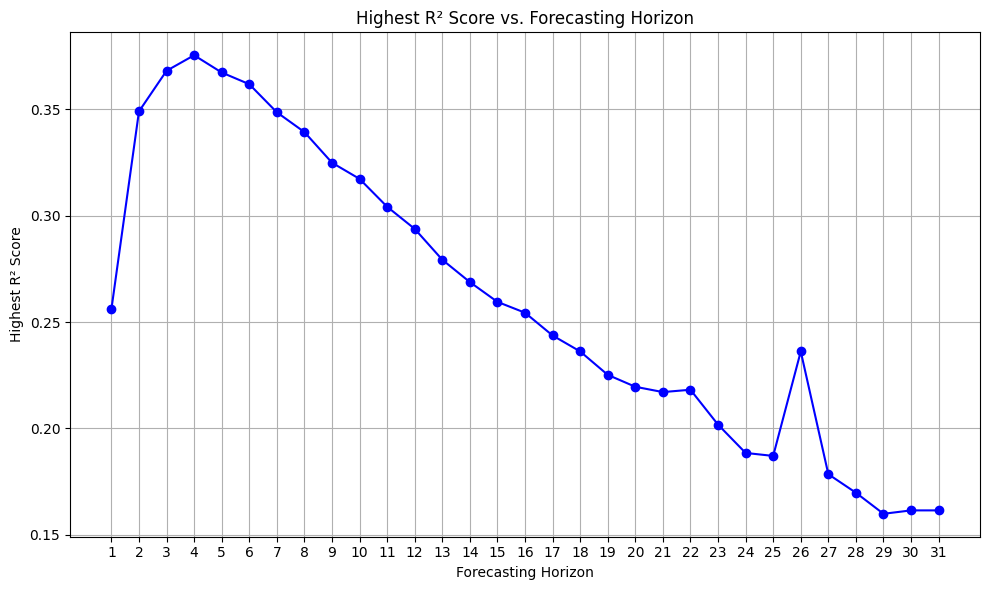

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
data = {
    'Forecasting Horizon': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
    'Highest R² Score': [0.256, 0.3490, 0.3681, 0.3754, 0.3673, 0.3618, 0.3486, 0.3393, 0.3249, 0.3173, 0.3042, 0.2938, 0.2793, 0.2688, 0.2595, 0.2544, 0.2437, 0.2362, 0.2252, 0.2196, 0.2171, 0.2182, 0.2018, 0.1885, 0.1871, 0.2362, 0.1785, 0.1698, 0.1599, 0.1615, 0.1615]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe())

# Check for anomalies: Horizon 26 has an unusually high R² score compared to its neighbors
horizon_26 = df[df['Forecasting Horizon'] == 26]
print("\nAnomaly at Horizon 26:")
print(horizon_26)

# Calculate the correlation of R² score with Forecasting Horizon
correlation = df['Forecasting Horizon'].corr(df['Highest R² Score'])
print(f"\nCorrelation between Forecasting Horizon and R² Score: {correlation:.4f}")

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['Forecasting Horizon'], df['Highest R² Score'], marker='o', color='b', linestyle='-', markersize=6)
plt.title('Highest R² Score vs. Forecasting Horizon')
plt.xlabel('Forecasting Horizon')
plt.ylabel('Highest R² Score')
plt.grid(True)
plt.xticks(df['Forecasting Horizon'])  # Ensure all horizons are shown
plt.tight_layout()

# Show plot
plt.show()


In [4]:
#read csv in dir ./09-Jun-2022/orderbook.csv
orderbook = pd.read_csv('/mnt/workspace/shell/input_data/old/09-Aug-2024/orderbook.csv')


In [7]:
# Convert 'datetime' column to datetime and then to int64
orderbook['datetime'] = pd.to_datetime(orderbook['datetime']).view(np.int64)

# Sort the DataFrame by the 'datetime' column
sorted_df = orderbook.sort_values(by='datetime')


/tmp/ipykernel_11313/183593114.py:2: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  orderbook['datetime'] = pd.to_datetime(orderbook['datetime']).view(np.int64)


In [6]:
p = sorted_df['datetime']

In [8]:
pp = p.view(np.int64)





/tmp/ipykernel_11313/1290475766.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  pp = p.view(np.int64)


In [9]:
pp  = pp
pp

0         1723161600024
1         1723161600110
2         1723161600304
3         1723161600321
4         1723161600414
              ...      
861241    1723247999416
861242    1723247999492
861243    1723247999591
861244    1723247999682
861245    1723247999975
Name: datetime, Length: 861246, dtype: int64

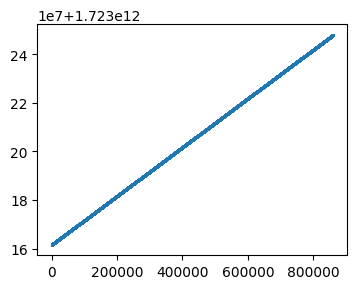

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (4, 3))
ax = plt.scatter(range(len(pp)), pp, s = 0.1)


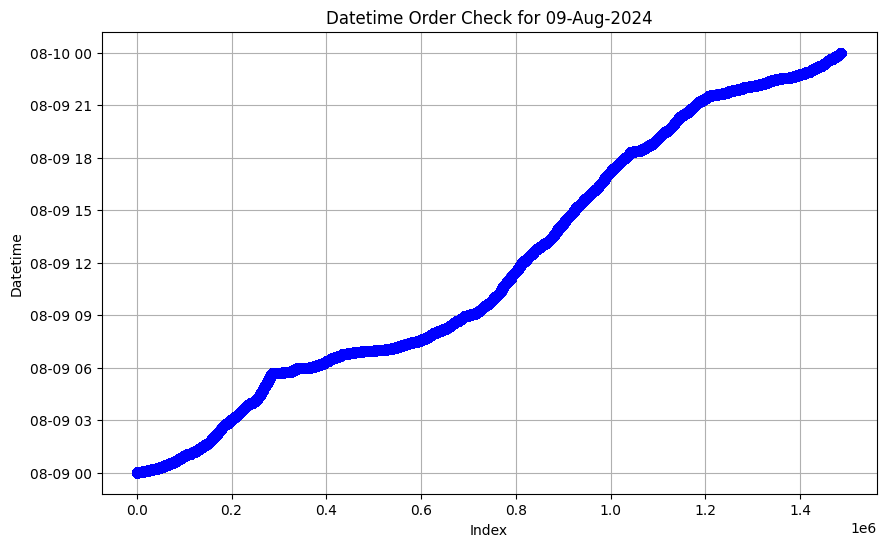

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the date you're working with
date = '09-Aug-2024'
file_path = f'/mnt/workspace/shell/input_data/old/{date}/aggTrade.csv'

# Load the CSV file for the specified date
sorted_aggtrade = pd.read_csv(file_path)

# Ensure 'datetime' is in datetime format
sorted_aggtrade['datetime'] = pd.to_datetime(sorted_aggtrade['datetime'])

# Plot the timestamps
plt.figure(figsize=(10, 6))
plt.plot(sorted_aggtrade['datetime'], marker='o', linestyle='-', color='blue')
plt.xlabel('Index')
plt.ylabel('Datetime')
plt.title(f'Datetime Order Check for {date}')
plt.grid(True)
plt.show()

In [14]:
import pandas as pd

def print_sample_timestamps(file_path, timestamp_column, n=50):
    df = pd.read_csv(file_path)
    df[timestamp_column] = pd.to_datetime(df[timestamp_column], unit='ms')
    print(f"Sample timestamps from {file_path}:")
    print(df[timestamp_column].head(n))
    print("\n")

# Check orderbook timestamps
print_sample_timestamps('/home/gaen/Documents/codespace-gaen/Simons/input_data/10-Aug-2024/orderbook.csv', 'datetime')

# Check aggtrade timestamps
print_sample_timestamps('/home/gaen/Documents/codespace-gaen/Simons/input_data/10-Aug-2024/aggTrade.csv', 'E')

FileNotFoundError: [Errno 2] No such file or directory: '/home/gaen/Documents/codespace-gaen/Simons/input_data/10-Aug-2024/orderbook.csv'

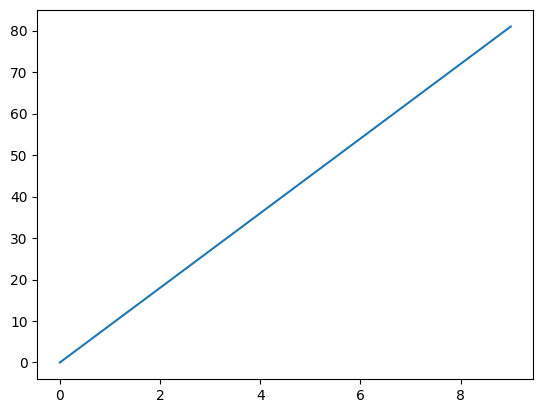

In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Example loop with dynamic output display
for i in range(10):
    plt.plot(range(10), [j*i for j in range(10)])  # Example plot
    plt.show()
    clear_output(wait=True)  # Clears the previous output before displaying the next one

In [2]:
import os
import shutil

# Define the base directory
base_dir = "/home/gaen/Documents/codespace-gaen/Simons/lab"

# Directories to search
sub_dirs = [f"raw_data-{i}" for i in range(1, 5)]

# Iterate over each raw_data-X directory
for sub_dir in sub_dirs:
    sub_dir_path = os.path.join(base_dir, sub_dir)
    
    for root, dirs, files in os.walk(sub_dir_path):
        for dir_name in dirs:
            src_dir = os.path.join(root, dir_name)
            # Calculate destination directory
            dst_dir = os.path.join(base_dir, dir_name)
            
            # Ensure destination directory exists
            os.makedirs(dst_dir, exist_ok=True)
            
            # Move files to the destination directory, keeping structure intact
            for item in os.listdir(src_dir):
                s = os.path.join(src_dir, item)
                d = os.path.join(dst_dir, item)
                
                if os.path.isdir(s):
                    # Recursively merge directories
                    shutil.move(s, d)
                else:
                    if os.path.exists(d):
                        # If file exists, rename to avoid overwrite
                        base, extension = os.path.splitext(item)
                        d = os.path.join(dst_dir, f"{base}_from_{sub_dir}{extension}")
                    
                    shutil.move(s, d)
        
        # Once the contents are moved, remove the empty directory
        if not os.listdir(root):
            os.rmdir(root)

print("Folders merged successfully.")

Folders merged successfully.


In [2]:
import numpy as np

# Example UTC timestamp in milliseconds
timestamp_ms = 1724331721037

# Convert milliseconds to integer seconds and fractional milliseconds
seconds = timestamp_ms // 1000  # Integer part (seconds)
milliseconds = timestamp_ms % 1000  # Milliseconds part

# Convert to numpy datetime64 in UTC
datetime_utc = np.datetime64(seconds, 's') + np.timedelta64(milliseconds, 'ms')

print(datetime_utc)

2024-08-22T13:02:01.037


In [5]:
import json

def validate_ndjson(filepath):
    valid_lines = []
    with open(filepath, 'r') as file:
        for line_num, line in enumerate(file, start=1):
            try:
                json.loads(line)
                valid_lines.append(line)
            except json.JSONDecodeError as e:
                print(f"Malformed JSON at line {line_num}: {e}")
                print(f"Line content: {line.strip()}")  # Print the line that caused the error
    return valid_lines

valid_data = validate_ndjson('/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_0.ndjson')

Malformed JSON at line 24873: Expecting ',' delimiter: line 1 column 407 (char 406)
Line content: {"lastUpdateId": 50891369098, "bids": [["59152.99000000", "5.03172000"], ["59152.64000000", "0.00611000"], ["59152.00000000", "0.15342000"], ["59151.75000000", "0.06326000"], ["59151.58000000", "0.03150000"], ["59151.48000000", "0.00028000"], ["59151.47000000", "0.33803000"], ["59151.46000000", "0.53356000"], ["59151.44000000", "0.00554000"], ["59151.09000000", "0.11993000"]], "asks": [["59153.0000000{"result": null, "id": 1, "datetime": "1724830813.4310596"}
Malformed JSON at line 70864: Expecting ',' delimiter: line 1 column 169 (char 168)
Line content: {"lastUpdateId": 50893312415, "bids": [["58636.00000000", "5.12146000"], ["58635.98000000", "0.00919000"], ["58635.97000000", "0.00869000"], ["58635.96000000", "0.037{"result": null, "id": 1, "datetime": "1724833459.1537635"}
Malformed JSON at line 109242: Expecting ':' delimiter: line 1 column 387 (char 386)
Line content: {"lastUpdateId"

In [2]:
import json

def fix_ndjson_file(input_filepath, output_filepath):
    with open(input_filepath, 'r') as infile, open(output_filepath, 'w') as outfile:
        for line_num, line in enumerate(infile, start=1):
            try:
                # Attempt to parse the JSON on this line
                json.loads(line)
                # If successful, write the line to the output file
                outfile.write(line)
            except json.JSONDecodeError as e:
                print(f"Malformed JSON at line {line_num}: {e}")
                # Optionally log the error or save the malformed line for further inspection

input_filepath = '/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_0.ndjson'
output_filepath = '/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_0_fixed.ndjson'

fix_ndjson_file(input_filepath, output_filepath)

print(f"Finished processing. Valid lines written to {output_filepath}.")

Malformed JSON at line 24873: Expecting ',' delimiter: line 1 column 407 (char 406)
Malformed JSON at line 70864: Expecting ',' delimiter: line 1 column 169 (char 168)
Malformed JSON at line 109242: Expecting ':' delimiter: line 1 column 387 (char 386)
Malformed JSON at line 137595: Expecting ',' delimiter: line 2 column 1 (char 202)
Malformed JSON at line 188260: Expecting ',' delimiter: line 1 column 680 (char 679)
Malformed JSON at line 214403: Expecting property name enclosed in double quotes: line 1 column 381 (char 380)
Malformed JSON at line 240169: Expecting ',' delimiter: line 1 column 232 (char 231)
Malformed JSON at line 265699: Expecting property name enclosed in double quotes: line 1 column 30 (char 29)
Malformed JSON at line 299188: Expecting ',' delimiter: line 1 column 57 (char 56)
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_0_fixed.ndjson.


In [15]:
import json

def fix_ndjson_file(input_filepath, output_filepath):
    with open(input_filepath, 'r') as infile, open(output_filepath, 'w') as outfile:
        for line_num, line in enumerate(infile, start=1):
            try:
                json.loads(line)  # Attempt to parse the JSON on this line
                outfile.write(line)  # If valid, write the line to the output file
            except json.JSONDecodeError as e:
                # Print the malformed line and the error
                print(f"Deleting malformed JSON at line {line_num}: {e}")
                print(f"Line content: {line.strip()}")


for i in range(0,27): 
    input_filepath = f'/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_{i}.ndjson'
    output_filepath = f'/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson'

    fix_ndjson_file(input_filepath, output_filepath)
    print (i)

    print(f"Finished processing. Valid lines written to {output_filepath}.")

0
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
1
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
2
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
3
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
4
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
5
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
6
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
7
Finished processing. Valid lines written to /home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/temp.ndjson.
8
Finished processing. Valid lines written to /home/gaen

FileNotFoundError: [Errno 2] No such file or directory: '/home/gaen/Documents/codespace-gaen/Simons/raw/28-Aug-2024/orderbook_ws_14.ndjson'

In [1]:
import pandas as pd
dang = pd.read_csv('/home/gaen/Documents/codespace-gaen/Simons/input_data/all/orderbook_agg_trade_dollarvol.csv')



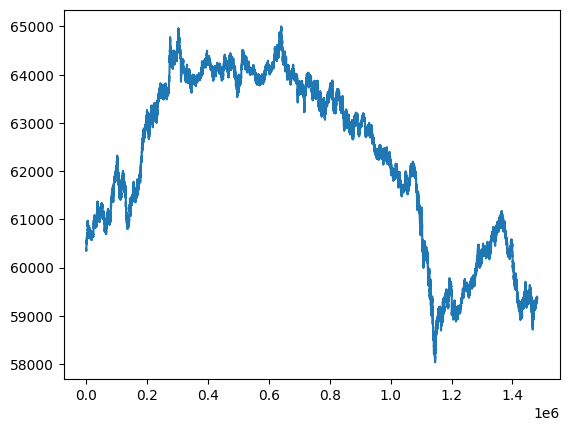

In [2]:
import matplotlib.pyplot as plt
plt.plot(dang['price'])
agg_trade = dang
agg_trade['w_midprice'] = (agg_trade['ask1']*agg_trade['askqty1']+agg_trade['bid1']*agg_trade['bidqty1'])/(agg_trade['askqty1']+agg_trade['bidqty1'])



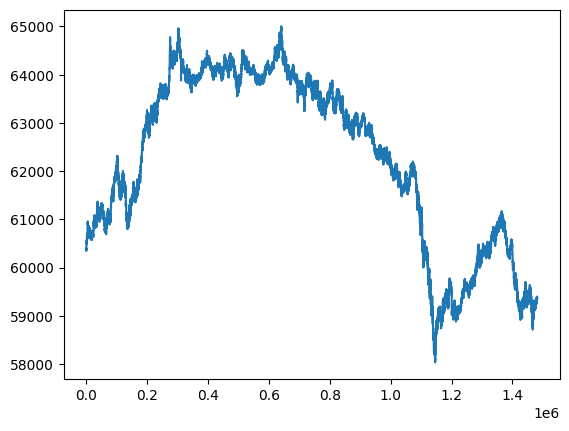

In [4]:
plt.plot(agg_trade['w_midprice'])


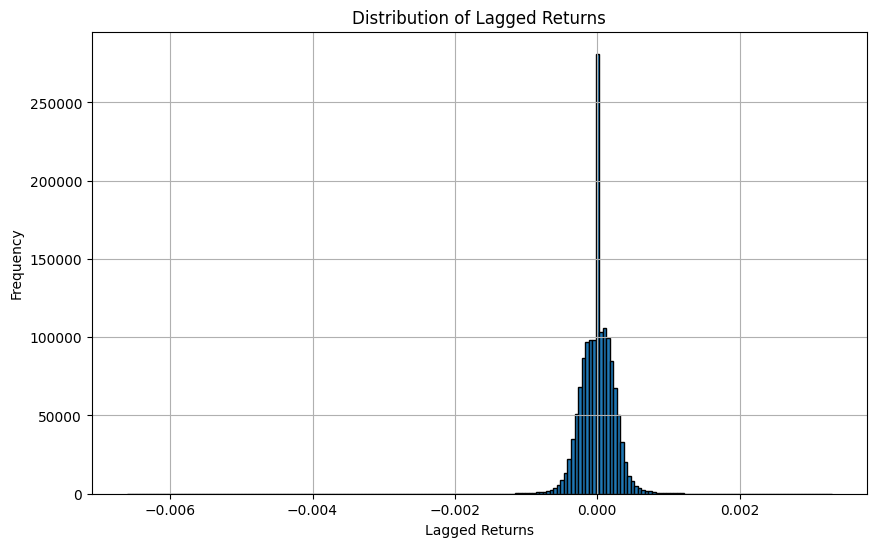

In [68]:
import numpy as np
agg_trade['lag_returns'] = np.log(agg_trade['w_midprice'].shift(0)/agg_trade['w_midprice'].shift(30))

lag_returns_list = agg_trade['lag_returns'].tolist()

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(lag_returns_list, bins=200, edgecolor='black')
plt.title('Distribution of Lagged Returns')
plt.xlabel('Lagged Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


(898495,) (1481482,)


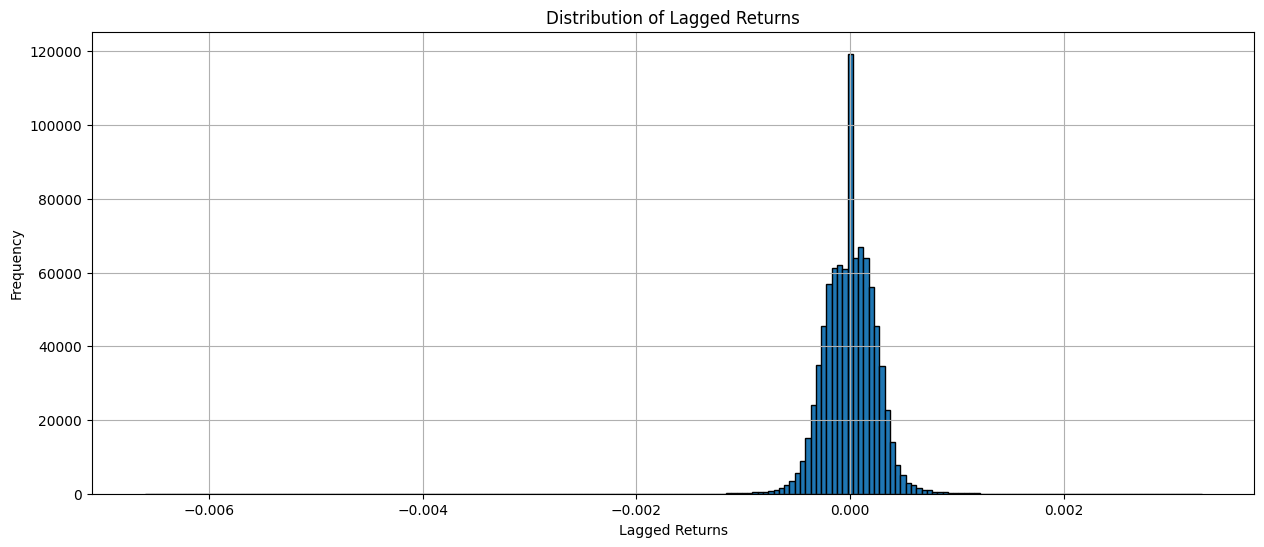

In [76]:
agg_trade_d= agg_trade.loc[(agg_trade['w_midprice'].shift(1) - agg_trade['w_midprice'])**2>0.0]
lag_returns_list = agg_trade_d['lag_returns'].tolist()
print(agg_trade_d['lag_returns'].shape , agg_trade['lag_returns'].shape )
# Create histogram
plt.figure(figsize=(15, 6))
plt.hist(lag_returns_list, bins=200, edgecolor='black')
plt.title('Distribution of Lagged Returns')
plt.xlabel('Lagged Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [77]:
agg_trade_d

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10,w_midprice,lag_returns
1,2024-08-23 00:00:00.485,60375.840000,0.03643,60375.830000,60375.790000,60375.350000,60375.140000,60375.020000,60374.980000,60374.820000,...,0.00050,0.00020,0.00082,0.16160,0.39730,0.00042,0.66234,0.01162,60375.830214,NaN
2,2024-08-23 00:00:00.671,60375.840000,0.04707,60375.830000,60375.790000,60375.350000,60375.140000,60375.020000,60374.980000,60374.660000,...,0.00025,0.00010,0.00041,0.00021,0.00581,0.00666,0.11850,0.00050,60375.830059,NaN
3,2024-08-23 00:00:02.174,60375.849294,0.02167,60375.840000,60375.830000,60375.795714,60375.515715,60375.277143,60375.086429,60374.865715,...,0.00388,0.00889,0.04123,0.04209,0.04725,0.88826,1.24402,1.58144,60375.840423,NaN
4,2024-08-23 00:00:03.820,60375.849738,0.05034,60375.840000,60375.830000,60375.494000,60375.266000,60375.076000,60374.924000,60374.768000,...,0.00048,0.20045,0.00047,0.01822,0.00045,1.17429,0.12576,0.31129,60375.840476,NaN
5,2024-08-23 00:00:04.104,60375.850000,0.04827,60375.840000,60375.830000,60375.350000,60375.140000,60374.980000,60374.840000,60374.660000,...,0.00009,0.09961,0.00010,0.00041,0.00009,0.09998,0.00580,0.00666,60375.840384,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481476,2024-08-29 23:59:56.828,59362.007822,0.06975,59362.768891,59361.836669,59361.824446,59361.521111,59361.135556,59361.048889,59360.708892,...,9.46274,3.28560,0.89178,1.51040,1.57670,2.60518,2.41551,1.15058,59362.778807,-0.000257
1481477,2024-08-29 23:59:58.262,59362.008642,0.11442,59362.000000,59361.180000,59361.161250,59361.087500,59360.876250,59360.001250,59359.982500,...,0.43384,0.18256,1.03336,1.98240,2.81866,3.76009,1.96180,1.43550,59362.009933,-0.000228
1481478,2024-08-29 23:59:59.102,59362.000000,0.05942,59362.000000,59361.110000,59361.100000,59361.000000,59360.010000,59360.000000,59359.980000,...,0.12652,0.09040,0.00088,0.51580,0.47540,0.60434,0.92230,0.05860,59362.009965,-0.000228
1481480,2024-08-29 23:59:59.290,59361.101353,0.07235,59361.100000,59361.010000,59361.000000,59360.010000,59360.000000,59359.960000,59359.000000,...,0.23160,2.98359,0.87558,0.13560,0.00132,0.77370,0.71310,0.90651,59361.109885,-0.000244


In [78]:
agg_trade_d.to_csv('/home/gaen/Documents/codespace-gaen/Simons/input_data/all/orderbook_agg_trade_dollarvol_drop_duplicate_price.csv', index=False)

(898495,) (1481482,)


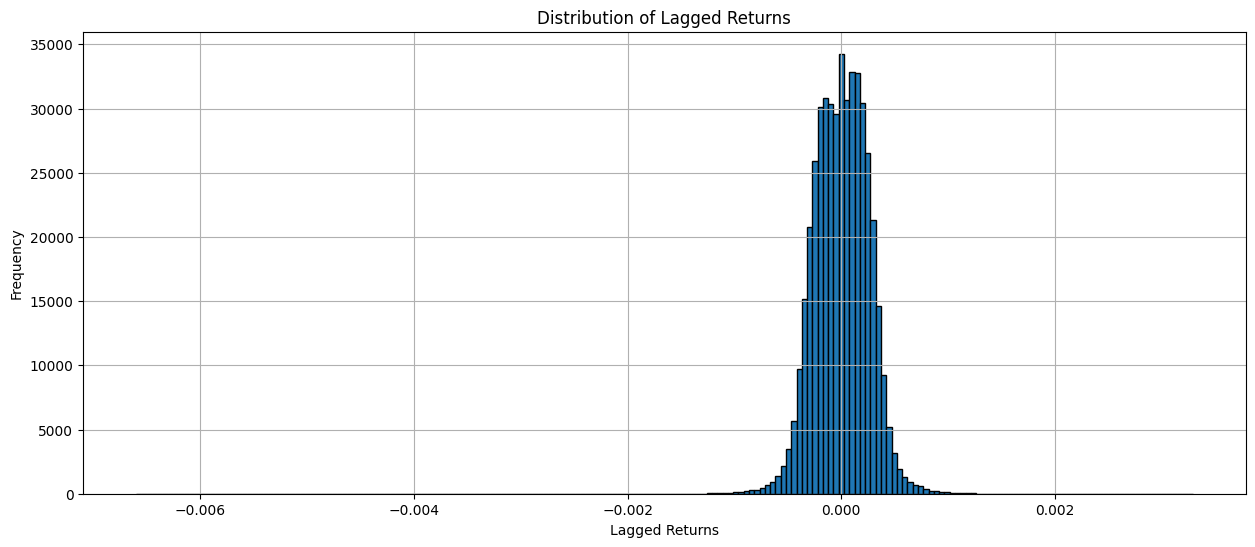

In [83]:
agg_trade_e= agg_trade.loc[(agg_trade['w_midprice'].shift(1) - agg_trade['w_midprice'])**2>0.000001]
lag_returns_list = agg_trade_e['lag_returns'].tolist()
print(agg_trade_d['lag_returns'].shape , agg_trade['lag_returns'].shape )
# Create histogram
plt.figure(figsize=(15, 6))
plt.hist(lag_returns_list, bins=200, edgecolor='black')
plt.title('Distribution of Lagged Returns')
plt.xlabel('Lagged Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [84]:
agg_trade_e.to_csv('/home/gaen/Documents/codespace-gaen/Simons/input_data/all/orderbook_agg_trade_dollarvol_drop_near_duplicate_price.csv', index=False)

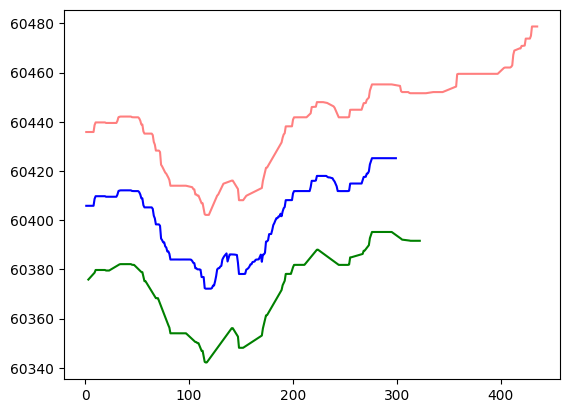

In [103]:
plt.plot(agg_trade_e['price'][0:100],color='green')
plt.plot(agg_trade['price'][1:300]+30,color='blue')
plt.plot(agg_trade_d['price'][0:300]+60,color='red',alpha=0.5)

In [4]:
#read csv : /home/gaen/Documents/codespace-gaen/Ts-master/input_data/All_to_Sept/orderbook_agg_trade_dollarvol.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dang = pd.read_csv('/home/gaen/Documents/codespace-gaen/Simons/input_data/all/orderbook_agg_trade_dollarvol_drop_near_duplicate_price.csv')

# Create a new column for direction of price change with lag of lag
lag = 15
dang['price_change'] = np.where(dang['price'].shift(-lag) > dang['price'], 1, -1)

In [14]:
import pandas as pd
import numpy as np

# Assuming `dang` is your DataFrame and it has a 'price' column
lag = 15
dang['price_change_3'] = np.where(dang['price'].shift(-lag) > dang['price'] + 5, 1,
                                np.where(dang['price'].shift(-lag) < dang['price'] - 5, -1, 0))
dang[0:50]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10,w_midprice,lag_returns,price_change,price_change_3
0,2024-08-23 00:00:02.174,60375.849294,0.02167,60375.840000,60375.830000,60375.795714,60375.515715,60375.277143,60375.086429,60374.865715,...,0.04123,0.04209,0.04725,0.88826,1.24402,1.58144,60375.840423,NaN,1,1
1,2024-08-23 00:00:05.042,60378.654800,0.02100,60377.356721,60377.206714,60377.118380,60376.711161,60376.633925,60376.120025,60375.979470,...,0.00987,0.70178,0.02171,0.80776,0.00302,0.07452,60377.357186,NaN,1,0
2,2024-08-23 00:00:05.102,60379.740000,0.02106,60379.740000,60379.370000,60379.190000,60378.850000,60378.840000,60377.660000,60377.550000,...,0.00630,6.97270,0.20720,7.43960,0.02030,0.01260,60379.740724,NaN,1,0
3,2024-08-23 00:00:05.828,60379.748564,0.04681,60379.740000,60379.460000,60379.296364,60378.920455,60378.906819,60377.992278,60377.884096,...,0.11616,1.90675,0.57911,2.66249,0.01553,0.32248,60379.741885,NaN,-1,0
4,2024-08-23 00:00:06.869,60379.740949,0.05193,60379.740000,60379.700000,60379.600000,60379.525000,60379.240000,60378.920000,60378.840000,...,0.10712,0.00323,0.33125,0.10714,0.00065,0.33134,60379.744305,NaN,1,0
5,2024-08-23 00:00:09.184,60379.746562,0.03455,60379.740000,60379.675000,60379.553333,60379.521667,60379.068334,60378.861667,60378.693334,...,0.00716,0.12108,0.00072,0.86256,0.00228,1.73891,60379.745668,NaN,-1,0
6,2024-08-23 00:00:13.738,60379.740000,0.09660,60379.740000,60379.710000,60379.700000,60379.670000,60379.630000,60379.530000,60379.520000,...,0.00027,0.33116,0.00086,0.00029,0.00018,0.12805,60379.749587,NaN,-1,0
7,2024-08-23 00:00:13.944,60379.528673,0.10731,60379.666667,60379.460002,60379.400003,60379.376669,60379.343340,60378.846682,60378.836680,...,0.06353,1.71741,0.33546,0.00231,0.00119,0.51248,60379.675942,NaN,-1,0
8,2024-08-23 00:00:14.607,60379.520100,0.03206,60379.520000,60378.933333,60378.798333,60378.743334,60378.724999,60377.513335,60377.378336,...,0.40484,0.06581,0.90876,1.32636,0.00402,0.00152,60379.528485,NaN,1,-1
9,2024-08-23 00:00:15.427,60379.525597,0.02946,60379.520000,60379.077500,60378.820000,60378.720000,60378.527500,60378.432500,60378.235000,...,0.00150,2.28396,0.79500,0.32320,0.00336,1.32464,60379.525387,NaN,-1,-1
